# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LR = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, opti in itertools.product(LR, OPTIMIZER):
    keras.backend.clear_session()
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    opt = opti(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    #Collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss':train_loss,
                             'valid-loss':valid_loss,
                             'train-acc':train_acc,
                             'valid-acc':valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000

50000/50000 [==============================] - 9s 178us/step - loss: 0.7803 - accuracy: 0.7233 - val_loss: 1.6249 - val_accuracy: 0.4972
Epoch 49/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.7700 - accuracy: 0.7261 - val_loss: 1.7105 - val_accuracy: 0.4782
Epoch 50/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.7550 - accuracy: 0.7328 - val_loss: 1.7955 - val_accuracy: 0.4688
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________

50000/50000 [==============================] - 11s 230us/step - loss: 2.3080 - accuracy: 0.1002 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.3081 - accuracy: 0.1001 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 11s 230us/step - loss: 2.3073 - accuracy: 0.1001 - val_loss: 2.3122 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.3079 - accuracy: 0.0993 - val_loss: 2.3098 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.3078 - accuracy: 0.1013 - val_loss: 2.3134 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.3077 - accuracy: 0.1012 - val_loss: 2.3102 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
_________________

50000/50000 [==============================] - 11s 216us/step - loss: 1.4412 - accuracy: 0.4846 - val_loss: 1.5324 - val_accuracy: 0.4592
Epoch 43/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.4384 - accuracy: 0.4840 - val_loss: 1.5752 - val_accuracy: 0.4377
Epoch 44/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.4276 - accuracy: 0.4889 - val_loss: 1.5798 - val_accuracy: 0.4298
Epoch 45/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.4243 - accuracy: 0.4867 - val_loss: 1.9042 - val_accuracy: 0.3520
Epoch 46/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.4190 - accuracy: 0.4917 - val_loss: 1.5303 - val_accuracy: 0.4455
Epoch 47/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.4062 - accuracy: 0.4958 - val_loss: 1.5802 - val_accuracy: 0.4333
Epoch 48/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.4056 - accuracy: 0.4955 - va

50000/50000 [==============================] - 13s 260us/step - loss: 2.3067 - accuracy: 0.0990 - val_loss: 2.3115 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.3077 - accuracy: 0.0984 - val_loss: 2.3095 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.3068 - accuracy: 0.1013 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.3065 - accuracy: 0.0989 - val_loss: 2.3084 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 13s 266us/step - loss: 2.3059 - accuracy: 0.0997 - val_loss: 2.3065 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 13s 266us/step - loss: 2.3068 - accuracy: 0.1007 - val_loss: 2.3082 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 13s 266us/step - loss: 2.3073 - accuracy: 0.0996 - va

50000/50000 [==============================] - 9s 185us/step - loss: 1.3256 - accuracy: 0.5339 - val_loss: 1.3972 - val_accuracy: 0.5066
Epoch 37/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.3166 - accuracy: 0.5397 - val_loss: 1.5111 - val_accuracy: 0.4683
Epoch 38/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.3115 - accuracy: 0.5390 - val_loss: 1.4764 - val_accuracy: 0.4744
Epoch 39/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.3024 - accuracy: 0.5403 - val_loss: 1.4276 - val_accuracy: 0.4850
Epoch 40/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.2893 - accuracy: 0.5459 - val_loss: 1.4758 - val_accuracy: 0.4742
Epoch 41/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.2890 - accuracy: 0.5476 - val_loss: 1.4818 - val_accuracy: 0.4705
Epoch 42/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.2807 - accuracy: 0.5529 - val_loss:

50000/50000 [==============================] - 12s 240us/step - loss: 1.8406 - accuracy: 0.3317 - val_loss: 1.8172 - val_accuracy: 0.3335
Epoch 34/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.8402 - accuracy: 0.3342 - val_loss: 1.8945 - val_accuracy: 0.3119
Epoch 35/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.8377 - accuracy: 0.3316 - val_loss: 1.9080 - val_accuracy: 0.3142
Epoch 36/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.8344 - accuracy: 0.3339 - val_loss: 1.8559 - val_accuracy: 0.33371.8337 
Epoch 37/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.8428 - accuracy: 0.3259 - val_loss: 1.8092 - val_accuracy: 0.3329
Epoch 38/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.8418 - accuracy: 0.3256 - val_loss: 1.8911 - val_accuracy: 0.3124
Epoch 39/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.8317 - accuracy: 0.33

50000/50000 [==============================] - 11s 221us/step - loss: 1.2300 - accuracy: 0.5666 - val_loss: 1.4168 - val_accuracy: 0.5023
Epoch 31/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.2212 - accuracy: 0.5692 - val_loss: 1.4018 - val_accuracy: 0.5083
Epoch 32/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.2121 - accuracy: 0.5698 - val_loss: 1.3888 - val_accuracy: 0.5076
Epoch 33/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.2020 - accuracy: 0.5761 - val_loss: 1.4338 - val_accuracy: 0.4864
Epoch 34/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.1964 - accuracy: 0.5775 - val_loss: 1.3620 - val_accuracy: 0.5223
Epoch 35/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.1820 - accuracy: 0.5832 - val_loss: 1.4076 - val_accuracy: 0.5037
Epoch 36/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.1785 - accuracy: 0.5836 - va

50000/50000 [==============================] - 13s 263us/step - loss: 1.4918 - accuracy: 0.4646 - val_loss: 1.5872 - val_accuracy: 0.4322
Epoch 28/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.4941 - accuracy: 0.4651 - val_loss: 1.5477 - val_accuracy: 0.4508
Epoch 29/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.4975 - accuracy: 0.4659 - val_loss: 1.5572 - val_accuracy: 0.4459
Epoch 30/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.4908 - accuracy: 0.4669 - val_loss: 1.5588 - val_accuracy: 0.4476
Epoch 31/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.5041 - accuracy: 0.4600 - val_loss: 1.5921 - val_accuracy: 0.4329
Epoch 32/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.4877 - accuracy: 0.4648 - val_loss: 1.6252 - val_accuracy: 0.4169
Epoch 33/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.4875 - accuracy: 0.4658 - va

50000/50000 [==============================] - 10s 197us/step - loss: 1.7985 - accuracy: 0.3779 - val_loss: 1.7979 - val_accuracy: 0.3779
Epoch 25/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.7916 - accuracy: 0.3797 - val_loss: 1.7919 - val_accuracy: 0.3794
Epoch 26/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.7850 - accuracy: 0.3821 - val_loss: 1.7848 - val_accuracy: 0.3808
Epoch 27/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.7787 - accuracy: 0.3840 - val_loss: 1.7789 - val_accuracy: 0.3858s -
Epoch 28/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.7727 - accuracy: 0.3868 - val_loss: 1.7742 - val_accuracy: 0.3819
Epoch 29/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.7668 - accuracy: 0.3880 - val_loss: 1.7669 - val_accuracy: 0.3859
Epoch 30/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.7609 - accuracy: 0.3899 -

50000/50000 [==============================] - 12s 246us/step - loss: 1.2352 - accuracy: 0.5583 - val_loss: 1.6823 - val_accuracy: 0.4269
Epoch 21/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.2166 - accuracy: 0.5658 - val_loss: 1.5322 - val_accuracy: 0.4782
Epoch 22/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.1928 - accuracy: 0.5744 - val_loss: 1.5915 - val_accuracy: 0.4548
Epoch 23/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.1726 - accuracy: 0.5812 - val_loss: 1.6452 - val_accuracy: 0.4698
Epoch 24/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.1583 - accuracy: 0.5838 - val_loss: 1.5590 - val_accuracy: 0.4631
Epoch 25/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.1354 - accuracy: 0.5938 - val_loss: 1.7296 - val_accuracy: 0.4376
Epoch 26/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.1201 - accuracy: 0.5994 - va

50000/50000 [==============================] - 11s 230us/step - loss: 1.4452 - accuracy: 0.4962 - val_loss: 1.5051 - val_accuracy: 0.4713
Epoch 18/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.4369 - accuracy: 0.4986 - val_loss: 1.4748 - val_accuracy: 0.4817
Epoch 19/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.4273 - accuracy: 0.5013 - val_loss: 1.4762 - val_accuracy: 0.4803
Epoch 20/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.4189 - accuracy: 0.5044 - val_loss: 1.4676 - val_accuracy: 0.4816
Epoch 21/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4098 - accuracy: 0.5077 - val_loss: 1.4856 - val_accuracy: 0.4748
Epoch 22/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4015 - accuracy: 0.5115 - val_loss: 1.4900 - val_accuracy: 0.4670
Epoch 23/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3948 - accuracy: 0.5137 - va

50000/50000 [==============================] - 13s 267us/step - loss: 1.2524 - accuracy: 0.5544 - val_loss: 1.3582 - val_accuracy: 0.5169
Epoch 15/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.2210 - accuracy: 0.5647 - val_loss: 1.3543 - val_accuracy: 0.5226
Epoch 16/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.2133 - accuracy: 0.5686 - val_loss: 1.3543 - val_accuracy: 0.5209
Epoch 17/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.1854 - accuracy: 0.5789 - val_loss: 1.4329 - val_accuracy: 0.5000
Epoch 18/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.1655 - accuracy: 0.5851 - val_loss: 1.3516 - val_accuracy: 0.5228
Epoch 19/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.1446 - accuracy: 0.5912 - val_loss: 1.3474 - val_accuracy: 0.5254
Epoch 20/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.1337 - accuracy: 0.5958 - va

50000/50000 [==============================] - 10s 193us/step - loss: 2.1927 - accuracy: 0.2119 - val_loss: 2.1896 - val_accuracy: 0.2179
Epoch 12/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.1860 - accuracy: 0.2161 - val_loss: 2.1830 - val_accuracy: 0.2233
Epoch 13/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.1795 - accuracy: 0.2220 - val_loss: 2.1766 - val_accuracy: 0.2276
Epoch 14/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.1732 - accuracy: 0.2273 - val_loss: 2.1704 - val_accuracy: 0.2323
Epoch 15/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.1672 - accuracy: 0.2328 - val_loss: 2.1644 - val_accuracy: 0.2368
Epoch 16/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.1613 - accuracy: 0.2358 - val_loss: 2.1586 - val_accuracy: 0.2431
Epoch 17/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.1556 - accuracy: 0.2408 - va

50000/50000 [==============================] - 12s 235us/step - loss: 1.5472 - accuracy: 0.4538 - val_loss: 1.6965 - val_accuracy: 0.4116
Epoch 8/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.5197 - accuracy: 0.4647 - val_loss: 1.6459 - val_accuracy: 0.4225
Epoch 9/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.4924 - accuracy: 0.4734 - val_loss: 1.5936 - val_accuracy: 0.4293
Epoch 10/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.4716 - accuracy: 0.4806 - val_loss: 1.5262 - val_accuracy: 0.4535s - loss: 1.4704 - accu
Epoch 11/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.4478 - accuracy: 0.4906 - val_loss: 1.4973 - val_accuracy: 0.4650
Epoch 12/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.4310 - accuracy: 0.4961 - val_loss: 1.4879 - val_accuracy: 0.4677
Epoch 13/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.4063 - 

Epoch 4/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.8682 - accuracy: 0.3524 - val_loss: 1.8644 - val_accuracy: 0.3543
Epoch 5/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.8469 - accuracy: 0.3597 - val_loss: 1.8442 - val_accuracy: 0.3616
Epoch 6/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.8305 - accuracy: 0.3654 - val_loss: 1.8296 - val_accuracy: 0.3626
Epoch 7/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.8172 - accuracy: 0.3704 - val_loss: 1.8190 - val_accuracy: 0.3683
Epoch 8/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.8057 - accuracy: 0.3743 - val_loss: 1.8075 - val_accuracy: 0.3726
Epoch 9/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.7956 - accuracy: 0.3780 - val_loss: 1.7983 - val_accuracy: 0.3776
Epoch 10/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.7869 - accuracy: 0.381

50000/50000 [==============================] - 14s 274us/step - loss: 1.8996 - accuracy: 0.3253 - val_loss: 1.7672 - val_accuracy: 0.3780
Epoch 2/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.7160 - accuracy: 0.3955 - val_loss: 1.6702 - val_accuracy: 0.4074
Epoch 3/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.6360 - accuracy: 0.4209 - val_loss: 1.6072 - val_accuracy: 0.4320
Epoch 4/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.5805 - accuracy: 0.4431 - val_loss: 1.5678 - val_accuracy: 0.4407
Epoch 5/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.5349 - accuracy: 0.4608 - val_loss: 1.5369 - val_accuracy: 0.4515
Epoch 6/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.4977 - accuracy: 0.4715 - val_loss: 1.5198 - val_accuracy: 0.4653
Epoch 7/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.4700 - accuracy: 0.4825 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.3891 - accuracy: 0.0928 - val_loss: 2.3811 - val_accuracy: 0.0950
Epoch 2/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.3767 - accuracy: 0.0928 - val_loss: 2.3699 - val_accuracy: 0.0950
Epoch 3/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.3664 - accuracy: 0.0925 - val_loss: 2.3605 - val_accuracy: 0.0960
Epoch 4/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.3578 - accuracy: 0.0929 - val_loss: 2.3526 - val_accuracy: 0.0966
Epoch 5/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.3505 - accuracy: 0.0932 - val_loss: 2.3460 - val_accuracy: 0.0972
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.3444 - accuracy: 0.0936 - val_loss: 2.3403 - val_accuracy: 0.0959
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 250us/step - loss: 2.1033 - accuracy: 0.2515 - val_loss: 1.9987 - val_accuracy: 0.3053
Epoch 2/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.9440 - accuracy: 0.3244 - val_loss: 1.9053 - val_accuracy: 0.3267
Epoch 3/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.8693 - accuracy: 0.3510 - val_loss: 1.8485 - val_accuracy: 0.3536
Epoch 4/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.8229 - accuracy: 0.3671 - val_loss: 1.8105 - val_accuracy: 0.3678
Epoch 5/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.7898 - accuracy: 0.3788 - val_loss: 1.7789 - val_accuracy: 0.3795
Epoch 6/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.7623 - accuracy: 0.3876 - val_loss: 1.7545 - val_accuracy: 0.3896
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 229us/step - loss: 2.2789 - accuracy: 0.1411 - val_loss: 2.2414 - val_accuracy: 0.1820
Epoch 2/50
50000/50000 [==============================] - 11s 230us/step - loss: 2.2248 - accuracy: 0.1952 - val_loss: 2.2095 - val_accuracy: 0.2041
Epoch 3/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.1980 - accuracy: 0.2159 - val_loss: 2.1866 - val_accuracy: 0.2201
Epoch 4/50
50000/50000 [==============================] - 11s 229us/step - loss: 2.1772 - accuracy: 0.2285 - val_loss: 2.1678 - val_accuracy: 0.2363
Epoch 5/50
50000/50000 [==============================] - 11s 229us/step - loss: 2.1595 - accuracy: 0.2383 - val_loss: 2.1517 - val_accuracy: 0.2421
Epoch 6/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.1444 - accuracy: 0.2458 - val_loss: 2.1379 - val_accuracy: 0.2475
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 269us/step - loss: 2.1489 - accuracy: 0.2287 - val_loss: 2.0217 - val_accuracy: 0.2921
Epoch 2/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.9518 - accuracy: 0.3205 - val_loss: 1.8990 - val_accuracy: 0.3432
Epoch 3/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.8675 - accuracy: 0.3518 - val_loss: 1.8408 - val_accuracy: 0.3609
Epoch 4/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.8186 - accuracy: 0.3689 - val_loss: 1.8001 - val_accuracy: 0.3796
Epoch 5/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.7816 - accuracy: 0.3822 - val_loss: 1.7662 - val_accuracy: 0.3920
Epoch 6/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.7519 - accuracy: 0.3945 - val_loss: 1.7464 - val_accuracy: 0.3903
Epoch 7/50
50000/50000 [==============================] 

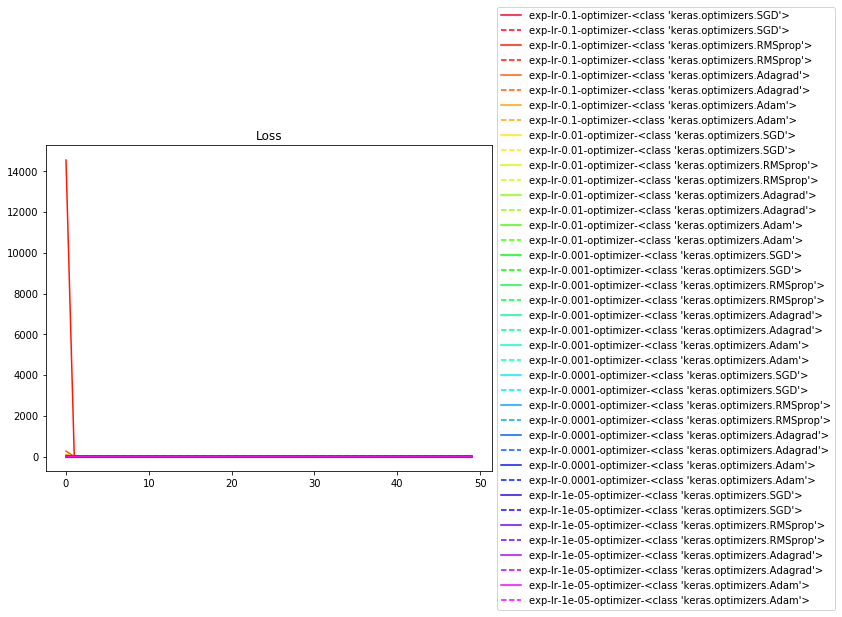

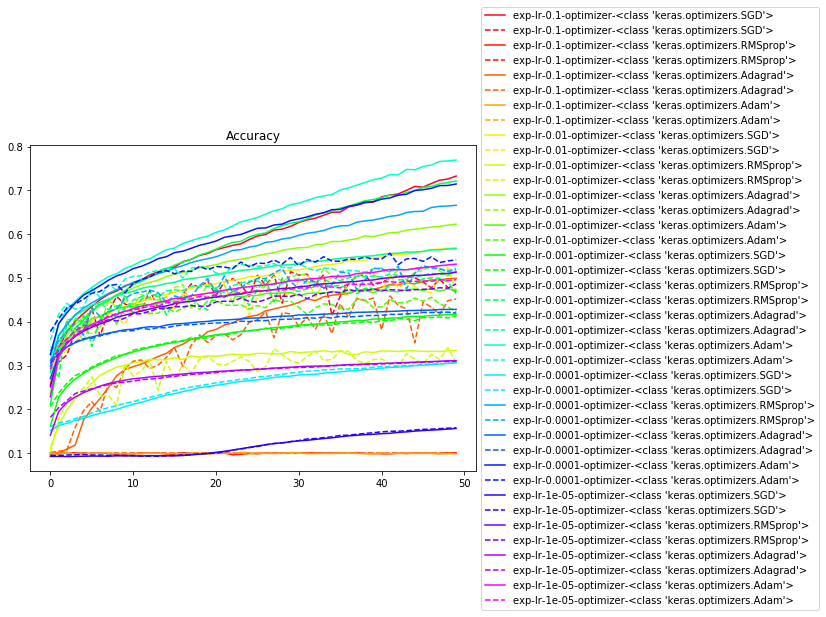

In [9]:
"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()